In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
# # Raw preprocessing
# results = pd.read_csv("results/eval_mmlu-13b_chat-verb1s2g.csv")
# results = results.rename(columns={'fuzzy_gpt-3.5-turbo-1106_acc': 'acc',
#  'fuzzy_gpt-3.5-turbo-1106_unc_acc': 'unc_acc',
#  'fuzzy_gpt-3.5-turbo-1106_unc_ece': 'ece'})
# results.loc[:, "method"] = "verb1s2g"
# results.to_csv("results/eval_mmlu-13b_chat-verb1s2g.csv", index=False)

In [4]:
ct_results = pd.read_csv("results/eval_mmlu-13b_chat-ct-oe.csv")
ct_results = ct_results[ct_results.method == "ct"]

verb1s_results = pd.read_csv("results/eval_mmlu-13b_chat-verb1s2g.csv")
verb1s_results = verb1s_results.groupby(["split", "dataset"]).first().reset_index()

common_datasets = list(set(ct_results.dataset.unique()).intersection(verb1s_results.dataset.unique()))

ct_results = ct_results[ct_results.dataset.isin(common_datasets)]

## Multiple evals?
verb1s_results = verb1s_results[verb1s_results.dataset.isin(common_datasets)]

results = pd.concat([ct_results, verb1s_results], ignore_index=True)

In [5]:
dname_map = {d: idx + 1 for idx, d in enumerate(results.dataset.unique())}

plt_results = results[results.split == "test"]
plt_results["task_idx"] = results.dataset.apply(lambda d: dname_map[d])
plt_results["ece_100"] = results["ece"] * 100.
plt_results["acc_100"] = results["acc"] * 100.
plt_results["unc_acc_100"] = results["unc_acc"] * 100.
plt_results = plt_results.sort_values("task_idx")
plt_results

/tmp/ipykernel_994846/1789983019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["task_idx"] = results.dataset.apply(lambda d: dname_map[d])
/tmp/ipykernel_994846/1789983019.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plt_results["ece_100"] = results["ece"] * 100.
/tmp/ipykernel_994846/1789983019.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentatio

,acc,unc_acc,ece,N,split,seed,model_name,model_dir,peft_dir,query_peft_dir,...,prompt_style,mode,log_dir,dataset,ts,method,task_idx,ece_100,acc_100,unc_acc_100
1,0.370915,0.449346,0.206790,612,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:professional_psychology,2834.021050,ct,1,20.679009,37.091503,44.934642
107,0.264706,1.000000,0.375817,612,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,ve_1s2g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s2g,mmlu:professional_psychology,16075.752649,verb1s2g,1,37.581697,26.470590,100.000000
95,0.199074,1.000000,0.382118,216,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,ve_1s2g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s2g,mmlu:high_school_statistics,5660.744794,verb1s2g,2,38.211805,19.907407,100.000000
3,0.222222,0.282407,0.427361,216,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:high_school_statistics,542.549842,ct,2,42.736084,22.222222,28.240740
5,0.320513,0.417949,0.217768,390,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:high_school_macroeconomics,1536.822682,ct,3,21.776805,32.051283,41.794872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,0.186275,1.000000,0.350495,102,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,ve_1s2g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s2g,mmlu:college_physics,2179.310004,verb1s2g,35,35.049507,18.627451,100.000000
80,0.352601,1.000000,0.388728,173,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,ve_1s2g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s2g,mmlu:college_medicine,4589.219028,verb1s2g,36,38.872833,35.260114,100.000000
71,0.410405,0.381503,0.294141,173,test,137,llama2_13b_chat,NaN,NaN,/data/users/sanyam_s/models/llm-calibration/Ll...,...,oe,oe_fuzzy_gpt-3.5-turbo-1106,/data/users/sanyam_s/logs/deeplearn/llm-calibr...,mmlu:college_medicine,973.043382,ct,36,29.414137,41.040462,38.150287
84,0.275132,1.000000,0.272836,378,test,137,llama2_13b_chat,NaN,NaN,NaN,...,oe,ve_1s2g_oe_fuzzy_gpt-3.5-turbo-1106,verbal_elic_1s2g,mmlu:elementary_mathematics,10783.706581,verb1s2g,37,27.283588,27.513227,99.999994


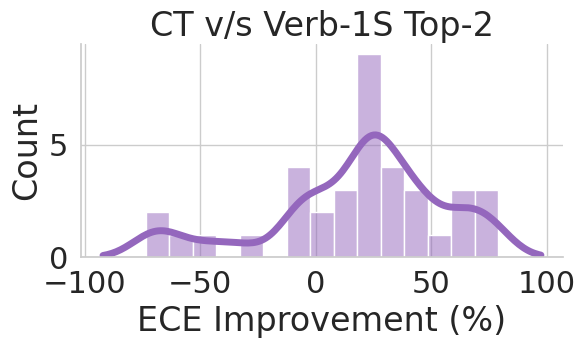

In [12]:
sns.set_theme(font_scale=2., style="whitegrid")

ref = plt_results[plt_results.method == "verb1s2g"]["ece_100"].values
new = plt_results[plt_results.method == "ct"]["ece_100"].values

g = sns.displot(pd.DataFrame({ "rel_imp": -((new - ref) / ref) * 100. }),
                # kind="kde", fill=True, bw_adjust=.5,
                kde=True, stat="count", kde_kws={"bw_adjust": .5, "cut": 2}, binwidth=10,
                height=4, aspect=5/3, legend=False,
                palette=sns.color_palette("tab20")[8:9])

g.ax.get_lines()[0].set(linewidth=5)

g.set(xlabel="ECE Improvement (%)", title="CT v/s Verb-1S Top-2")

g.fig.tight_layout()
g.fig.show()
# g.fig.savefig("mmlu_rel_imp_ct_verb1s-top2.pdf", bbox_inches="tight")